In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [76]:
data = pd.read_csv("/Users/jacopobinati/Desktop/Prediction ML/assignment1/DA3-phdma/HM1/morg-2014-emp.csv")
data
#Data imported correctly since we have 149316 observations

/var/folders/6t/d3d0rh5d1rd426bk9g_mnhd00000gn/T/ipykernel_63950/4005672990.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/jacopobinati/Desktop/Prediction ML/assignment1/DA3-phdma/HM1/morg-2014-emp.csv")


,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,...,2,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,...,2,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,...,2,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,...,2,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149311,317051,896679860459501,December,WY,346.2296,692.30,40,39,1,NaN,...,0,0,"Native, Born In US",8,Office supplies and stationery stores (45321),4760,"Private, For Profit",No,No,Employed-At Work
149312,317052,907086820569600,December,WY,294.9800,1984.61,40,44,1,NaN,...,1,3,"Native, Born In US",8,Administration of human resource programs (923),430,Government - State,No,No,Employed-At Work
149313,317053,907086820569600,December,WY,324.1761,2884.61,55,43,1,NaN,...,1,3,"Native, Born In US",8,Nursing care facilities (6231),10,"Private, For Profit",No,No,Employed-At Work
149314,317055,950868097156649,December,WY,321.6982,1153.84,40,42,1,NaN,...,0,0,"Native, Born In US",8,Hospitals (622),5820,"Private, Nonprofit",No,No,Employed-At Work


We will keep only workers in the cathegory: Medial and health services manager. 
The Census Code is: 0350
The SOC CODE is 11-9111

In [77]:
# CLEANING AND CREATION OF NEW VARIABLE

data = data[(data['occ2012'] == 2830)]
summary = data.describe()
summary_code = data['occ2012'].describe()
summary1 = data['lfsr94'].describe()

# create the variable
data['w'] = data['earnwke'] / data['uhours']
data['lnw'] = np.log(data['w'])
data['agesqr'] = data['age']**2

#rewrite the variable sex as follows: 1 for Male and 0 for Female
data['sex'] = data['sex'].replace({1: 1, 2: 0})
data = data[data['lfsr94'] == "Employed-At Work"]

summary_code = data['occ2012'].describe()
summary1 = data['lfsr94'].describe()

/var/folders/6t/d3d0rh5d1rd426bk9g_mnhd00000gn/T/ipykernel_63950/928573523.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['w'] = data['earnwke'] / data['uhours']
/var/folders/6t/d3d0rh5d1rd426bk9g_mnhd00000gn/T/ipykernel_63950/928573523.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lnw'] = np.log(data['w'])
/var/folders/6t/d3d0rh5d1rd426bk9g_mnhd00000gn/T/ipykernel_63950/928573523.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [78]:
# create a new var which create a list of values for each state
states = sorted(data['stfips'].unique())
state_code = {state: code for code, state in enumerate(states, start=1)}
data['state_code'] = data['stfips'].map(state_code)

# Getting some insights regarding the dataset
columns_of_interest = ['earnwke', 'uhours', 'w', 'agesqr'] 
specific_columns_stats = data[columns_of_interest].describe()


print(specific_columns_stats)
print(state_code)
data['sex'].value_counts()

           earnwke      uhours           w       agesqr
count   152.000000  152.000000  152.000000   152.000000
mean   1099.228355   38.611842   28.665901  1735.223684
std     654.002655    9.550874   19.121826  1020.689464
min      30.000000    4.000000    2.692000   256.000000
25%     694.800000   40.000000   17.734937   841.000000
50%     961.530000   40.000000   24.719500  1521.000000
75%    1442.300000   40.000000   34.973682  2425.750000
max    2884.610000   60.000000  171.794667  4096.000000
{'CA': 1, 'CO': 2, 'CT': 3, 'DC': 4, 'DE': 5, 'FL': 6, 'GA': 7, 'HI': 8, 'IA': 9, 'ID': 10, 'IL': 11, 'IN': 12, 'KS': 13, 'LA': 14, 'MA': 15, 'MD': 16, 'ME': 17, 'MI': 18, 'MN': 19, 'MO': 20, 'MS': 21, 'MT': 22, 'ND': 23, 'NE': 24, 'NH': 25, 'NJ': 26, 'NM': 27, 'NV': 28, 'NY': 29, 'OH': 30, 'OR': 31, 'PA': 32, 'SC': 33, 'TN': 34, 'TX': 35, 'UT': 36, 'VA': 37, 'VT': 38, 'WA': 39, 'WI': 40, 'WY': 41}


sex
1    77
0    75
Name: count, dtype: int64

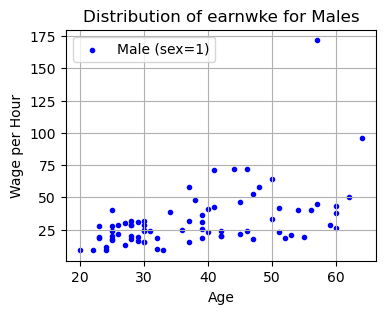

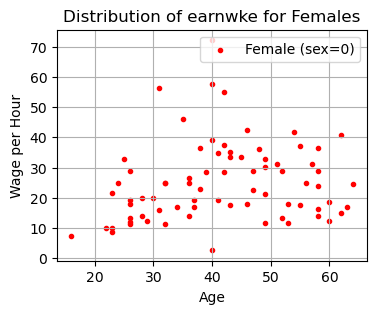

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


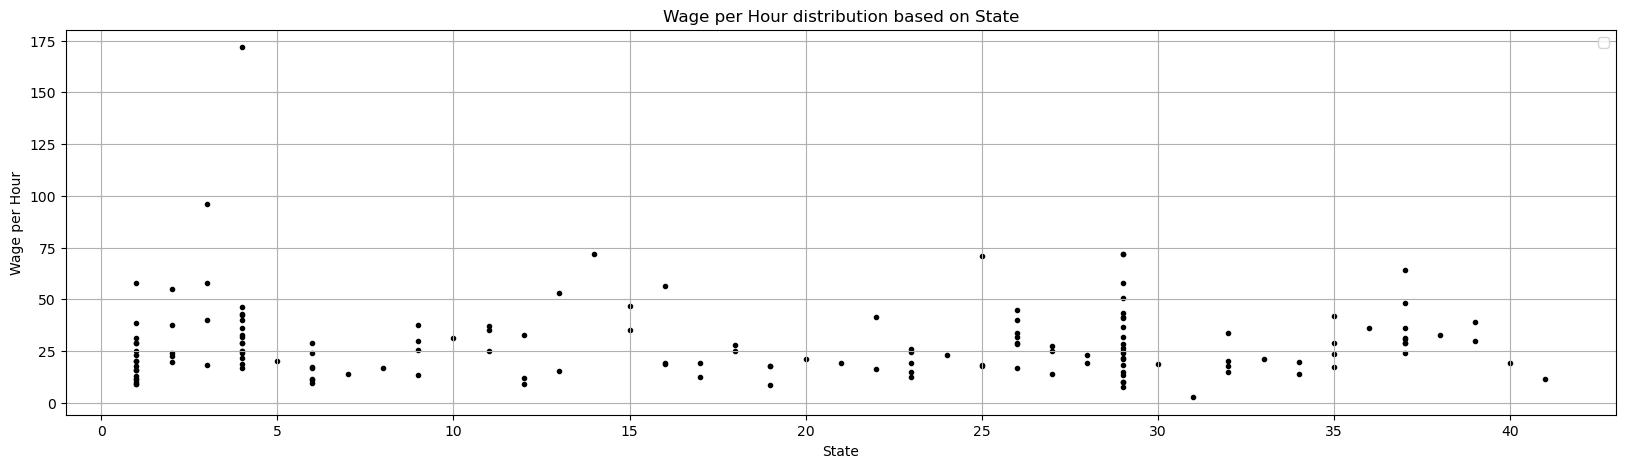

In [79]:
data_male = data[data['sex'] == 1]
data_female = data[data['sex'] == 0]
plt.figure(figsize=(4, 3))
plt.scatter(data_male['age'], data_male['w'], color='blue', marker='.', label='Male (sex=1)')
plt.title('Distribution of earnwke for Males')
plt.xlabel('Age')
plt.ylabel('Wage per Hour')
plt.legend()
plt.grid(True)
plt.show()
#######
plt.figure(figsize=(4, 3))
plt.scatter(data_female['age'], data_female['w'], color='red', marker='.', label='Female (sex=0)')
plt.title('Distribution of earnwke for Females')
plt.xlabel('Age')
plt.ylabel('Wage per Hour')
plt.legend()
plt.grid(True)
plt.show()
#######
plt.figure(figsize=(20, 5))
plt.scatter(data['state_code'], data['w'], color='black', marker='.')
plt.title("Wage per Hour distribution based on State")
plt.xlabel('State')
plt.ylabel('Wage per Hour')
plt.legend()
plt.grid(True)
plt.show()


Now we have:
1) chosen a working category which, in this case, is 2100, "Lawyers, Judges, magistrates, and other judicial workers".
2) Cleaned and organized the dataset 
    2.1) in the two graph we can see how there a different distribution of wages between female and male.
3) we extrapplate some insight from the dataset, which from the original 149316 observations, now has 1002.
4) We are able to visualize data using python libraries such as matplotlib and seaborn.


In [87]:
reg1 = smf.ols(formula="lnw ~ age", data=data).fit()
reg1.summary()
predicted_values = reg1.predict()
actual_values = data['lnw']
mse = mean_squared_error(actual_values, predicted_values)
print("Mean Squared Error (MSE):", mse)
print(reg1.summary())

Mean Squared Error (MSE): 0.2725361313829913
                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     21.41
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           7.97e-06
Time:                        09:26:48   Log-Likelihood:                -116.88
No. Observations:                 152   AIC:                             237.8
Df Residuals:                     150   BIC:                             243.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interce

/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

Let's build a second model where we take in consideration a second

In [86]:
reg2 = smf.ols(formula="lnw ~ age + agesqr", data=data).fit()
reg2.summary()
predicted_values = reg2.predict()
actual_values = data['lnw']
mse = mean_squared_error(actual_values, predicted_values)
print("Mean Squared Error (MSE):", mse)
print(reg2.summary())

Mean Squared Error (MSE): 0.25657192184259836
                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     15.93
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           5.38e-07
Time:                        09:26:42   Log-Likelihood:                -112.29
No. Observations:                 152   AIC:                             230.6
Df Residuals:                     149   BIC:                             239.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interc

/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype

In [85]:
reg3 = smf.ols(formula="lnw ~ age + agesqr + sex", data=data).fit()
reg3.summary()
predicted_values = reg3.predict()
actual_values = data['lnw']
mse = mean_squared_error(actual_values, predicted_values)
print("Mean Squared Error (MSE):", mse)
print(reg3.summary())


Mean Squared Error (MSE): 0.23844833064575488
                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     15.10
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           1.26e-08
Time:                        09:26:35   Log-Likelihood:                -106.72
No. Observations:                 152   AIC:                             221.4
Df Residuals:                     148   BIC:                             233.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interc

/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype

In [84]:
reg4 = smf.ols(formula="lnw ~ age + agesqr + sex + ownchild", data=data).fit()
reg4.summary()
predicted_values = reg4.predict()
actual_values = data['lnw']
mse = mean_squared_error(actual_values, predicted_values)
print("Mean Squared Error (MSE):", mse)
print(reg4.summary())

Mean Squared Error (MSE): 0.23688807081181606
                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     11.56
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           3.44e-08
Time:                        09:25:08   Log-Likelihood:                -106.23
No. Observations:                 152   AIC:                             222.5
Df Residuals:                     147   BIC:                             237.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interc

/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype